# Project 2: Part 2- Data Exploration
- Coire Gavin-Hanner
- 8/11/22

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [2]:
df = pd.read_csv('cars_multiple_linearR.csv')

In [3]:
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


# Drop Unnecessary columns

In [5]:
df['Registration'].value_counts()

yes    3947
no      398
Name: Registration, dtype: int64

In [7]:
df['Body'].value_counts()

sedan        1649
crossover     901
van           675
other         433
vagon         402
hatch         285
Name: Body, dtype: int64

In [8]:
df['Brand'].value_counts()

Volkswagen       936
Mercedes-Benz    921
BMW              694
Toyota           541
Renault          469
Audi             457
Mitsubishi       327
Name: Brand, dtype: int64

In [9]:
df['Model'].value_counts()

E-Class    199
A6         172
Vito       171
Kangoo     146
Camry      134
          ... 
IQ           1
G 320        1
A 160        1
SLK 350      1
Scion        1
Name: Model, Length: 312, dtype: int64

There are too many unique values in the Model variable for that to be a useful column so I will drop it

In [11]:
df.drop(columns='Model', inplace=True)

# Duplicate Rows

In [16]:
df.duplicated().sum()

93

In [17]:
df[df.duplicated(keep=False)]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
5,Mercedes-Benz,199999.0,crossover,0,5.50,Petrol,yes,2016
29,Mercedes-Benz,NaN,crossover,0,4.60,Petrol,yes,2016
45,BMW,41000.0,crossover,80,3.00,Petrol,yes,2012
55,Mercedes-Benz,NaN,crossover,0,3.00,Diesel,yes,2016
73,Mercedes-Benz,20400.0,sedan,190,1.80,Gas,yes,2011
...,...,...,...,...,...,...,...,...
4231,Mercedes-Benz,NaN,crossover,27,3.00,Diesel,yes,2015
4274,Mercedes-Benz,109999.0,crossover,0,2.98,Diesel,yes,2016
4277,Mercedes-Benz,111999.0,crossover,0,3.00,Diesel,yes,2016
4311,Renault,10500.0,vagon,185,1.50,Diesel,yes,2011


In [18]:
df.drop_duplicates(inplace=True)

# Missing Values

In [19]:
df.isna().sum()

Brand             0
Price           145
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [22]:
(df.isna().sum().max()/len(df))*100

3.5277516462841016

only about 3% of the data are missing values so I will just drop the rows with missing values. This is the best strategy because the target variable is one of the variables with missing values.

In [24]:
df.dropna(inplace=True)

# Inconsistencies in Categorical Data

In [28]:
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


In [29]:
df['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [30]:
df['Body'].unique()

array(['sedan', 'van', 'crossover', 'vagon', 'other', 'hatch'],
      dtype=object)

In [31]:
df['Engine Type'].unique()

array(['Petrol', 'Diesel', 'Gas', 'Other'], dtype=object)

In [33]:
# for an american audience
df['Engine Type'].replace({'Petrol':'Gas'}, inplace=True)

In [36]:
df['Registration'].unique()

array(['yes', 'no'], dtype=object)

# Univariate Explorations

## Categorical Data

<AxesSubplot:>

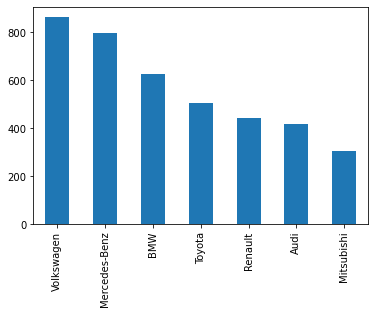

In [38]:
df['Brand'].value_counts().plot(kind='bar')

<AxesSubplot:>

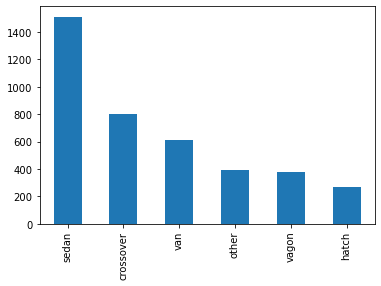

In [41]:
df['Body'].value_counts().plot(kind='bar')

<AxesSubplot:>

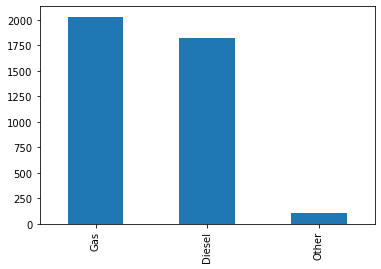

In [42]:
df['Engine Type'].value_counts().plot(kind='bar')

<AxesSubplot:>

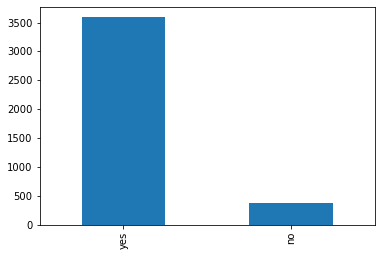

In [43]:
df['Registration'].value_counts().plot(kind='bar')

## Numerical Data

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3959 entries, 0 to 4342
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         3959 non-null   object 
 1   Price         3959 non-null   float64
 2   Body          3959 non-null   object 
 3   Mileage       3959 non-null   int64  
 4   EngineV       3959 non-null   float64
 5   Engine Type   3959 non-null   object 
 6   Registration  3959 non-null   object 
 7   Year          3959 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 278.4+ KB


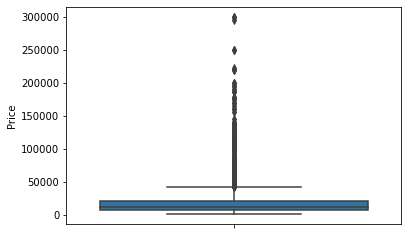

In [45]:
sns.boxplot(y='Price', data=df);

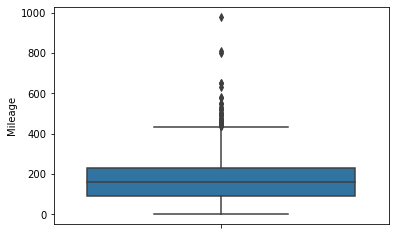

In [46]:
sns.boxplot(y='Mileage', data=df);

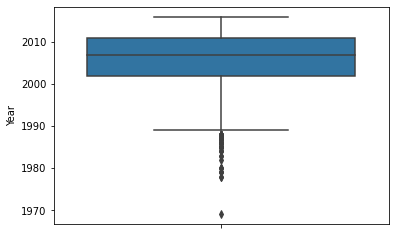

In [47]:
sns.boxplot(y='Year', data=df);

# Outliers

In [50]:
df.describe()

,Price,Mileage,EngineV,Year
count,3959.000000,3959.000000,3959.000000,3959.000000
mean,18926.857025,164.977014,2.763142,2006.277343
std,24545.658273,103.150267,4.974467,6.683857
min,600.000000,0.000000,0.600000,1969.000000
25%,6950.000000,93.000000,1.800000,2002.000000
50%,11300.000000,160.000000,2.200000,2007.000000
75%,21200.000000,230.000000,3.000000,2011.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [53]:
mile_filter = df['Mileage'] > 450

In [58]:
len(df.loc[mile_filter])

29

In [57]:
year_filter = df['Year'] == 2016
df.loc[year_filter]['Mileage'].max()

47

There are likely some outliers here in the mileage variable, but they are hard to distinguish from real values. An example of a likely outlier is entry 2607, a 2013 Mercedes that is recorded as driving 980,000 miles. This dataset is likely from 2016 as that is the most recent year recorded in it. If a car purchased in 2013 drove 980,000 miles in 3 years, it would have had to continuously drive close to 37 mph. 

Because it is likely that there is a mixture of incorrect values and true values in the outliers, I will not attempt to fix data beyond a certain threshold. There are only 29 data above 450,000 miles so i will simply delete them

In [64]:
df.drop(index=df.loc[mile_filter].index, inplace=True)

In [65]:
df.describe()

,Price,Mileage,EngineV,Year
count,3930.000000,3930.000000,3930.000000,3930.000000
mean,18995.872000,162.114758,2.766102,2006.341221
std,24593.253833,97.419763,4.992230,6.638915
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,92.000000,1.800000,2003.000000
50%,11450.000000,158.000000,2.200000,2007.000000
75%,21458.750000,230.000000,3.000000,2011.000000
max,300000.000000,450.000000,99.990000,2016.000000


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3930 entries, 0 to 4342
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         3930 non-null   object 
 1   Price         3930 non-null   float64
 2   Body          3930 non-null   object 
 3   Mileage       3930 non-null   int64  
 4   EngineV       3930 non-null   float64
 5   Engine Type   3930 non-null   object 
 6   Registration  3930 non-null   object 
 7   Year          3930 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 276.3+ KB
